In [33]:
# importing all the require libraries
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as s
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import os 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the data
os.chdir ('F:\\Acmegrade__ML\\Data_file_folder\\')
data = pd.read_csv('data_cancer_prediction.csv')
display (data)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
# checking data_types and size of the data 
display(data.shape)

display(data.dtypes)

(569, 32)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
# Checking whether any null value is there in the data
display(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
# changing the data_type of 'diagnosis' using cat.codes

data['diagnosis'] = data['diagnosis'].astype('category')

data['diagnosis'] = data['diagnosis'].cat.codes
print(data.dtypes)

id                           int64
diagnosis                     int8
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
# Taking all the independent variables
x = data.drop('diagnosis',axis =1).drop('id',axis =1)
display (x)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
# Taking the dependent variable 
y = data['diagnosis']
display(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int8

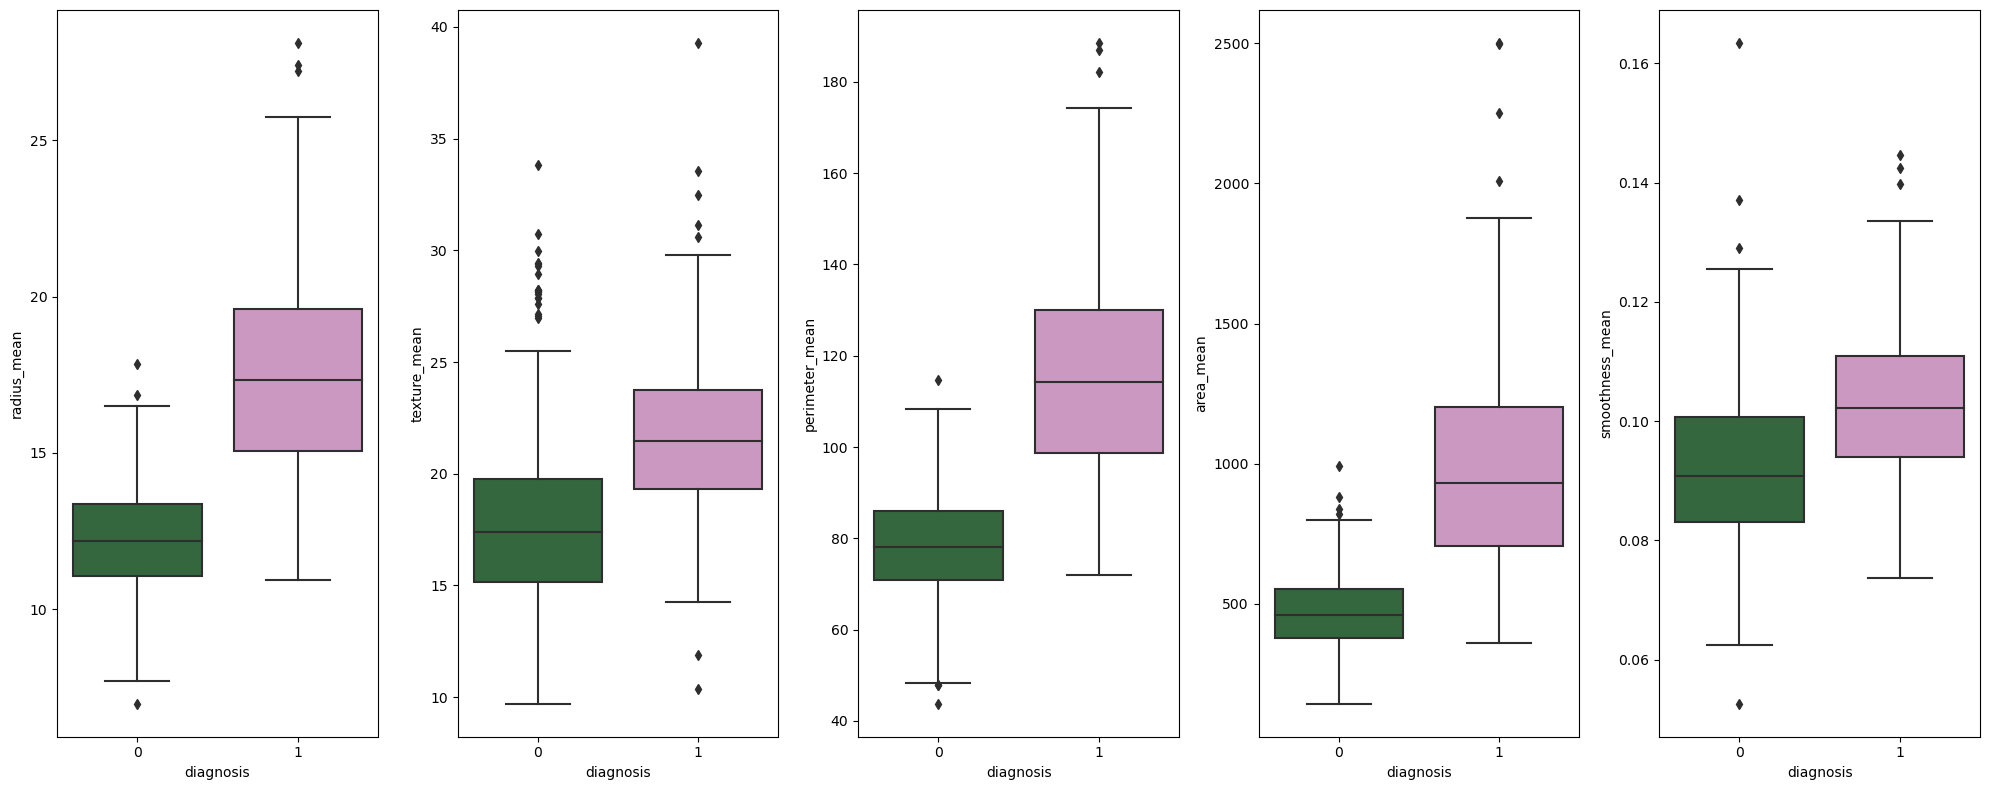

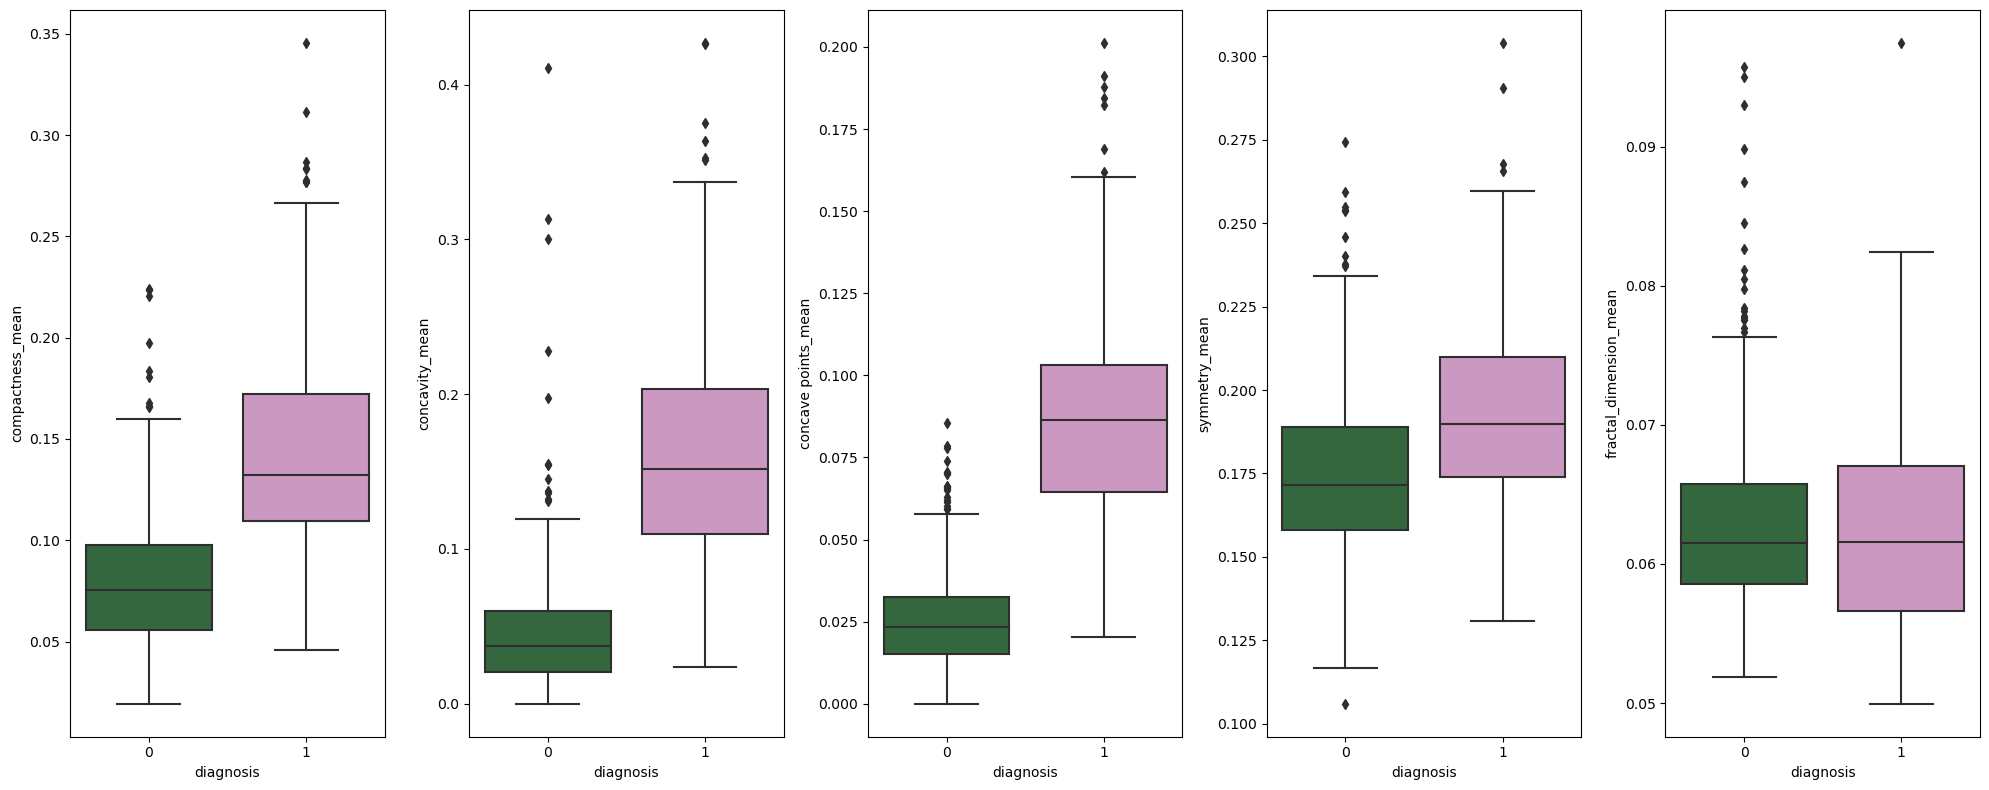

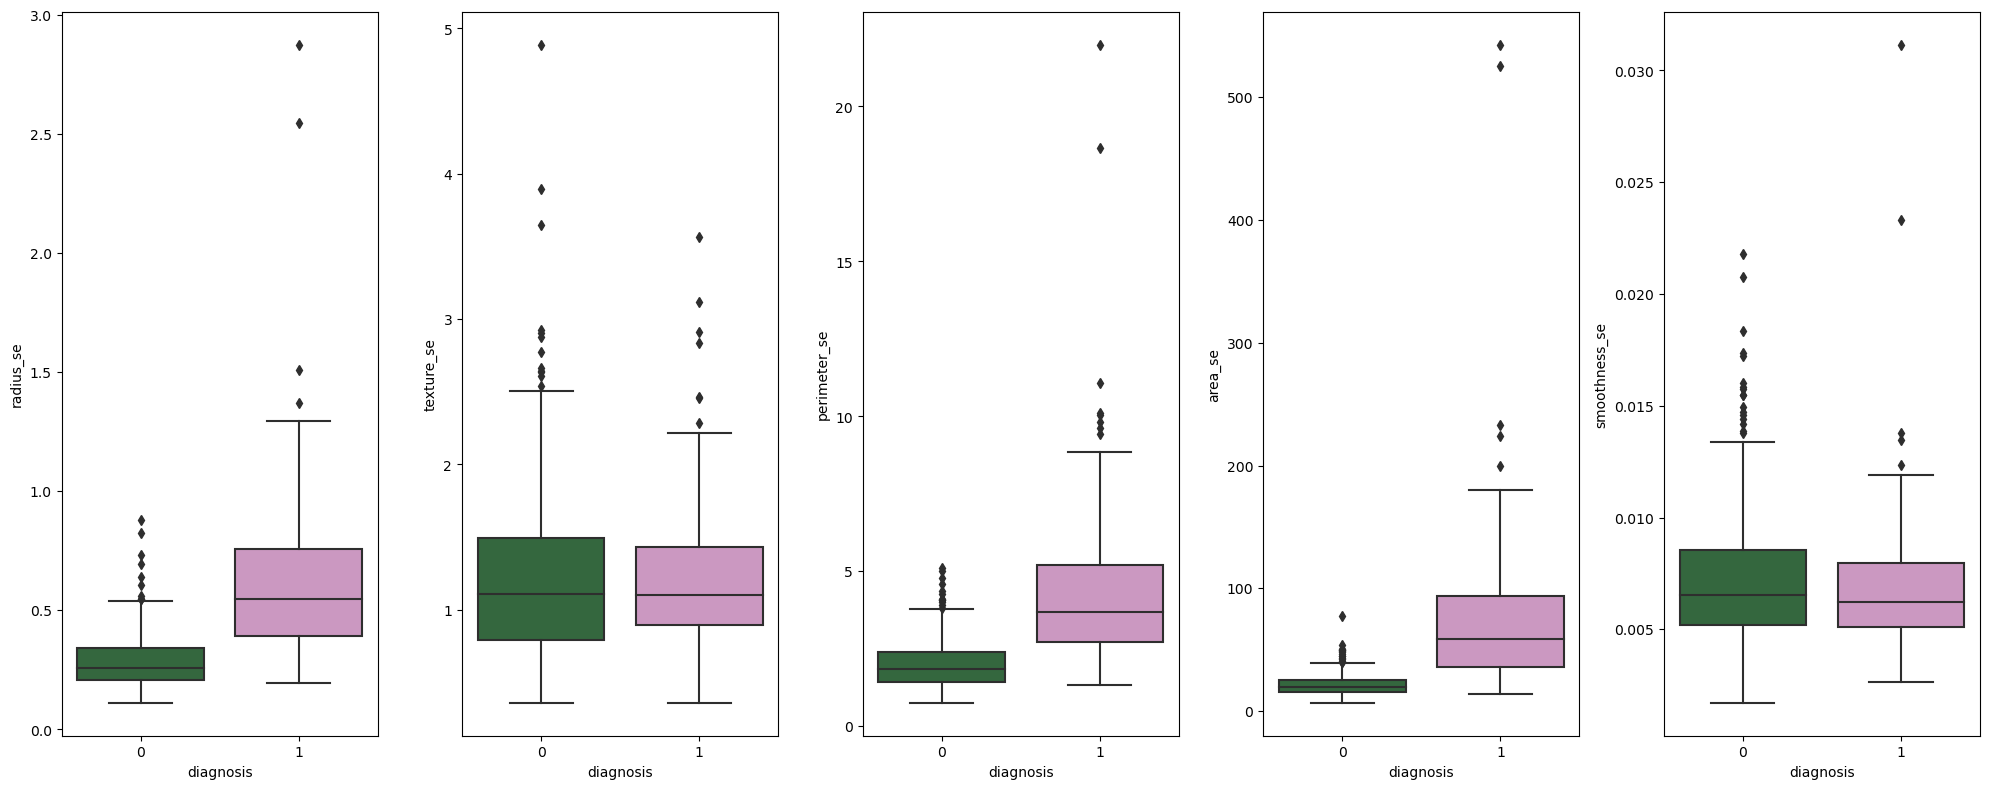

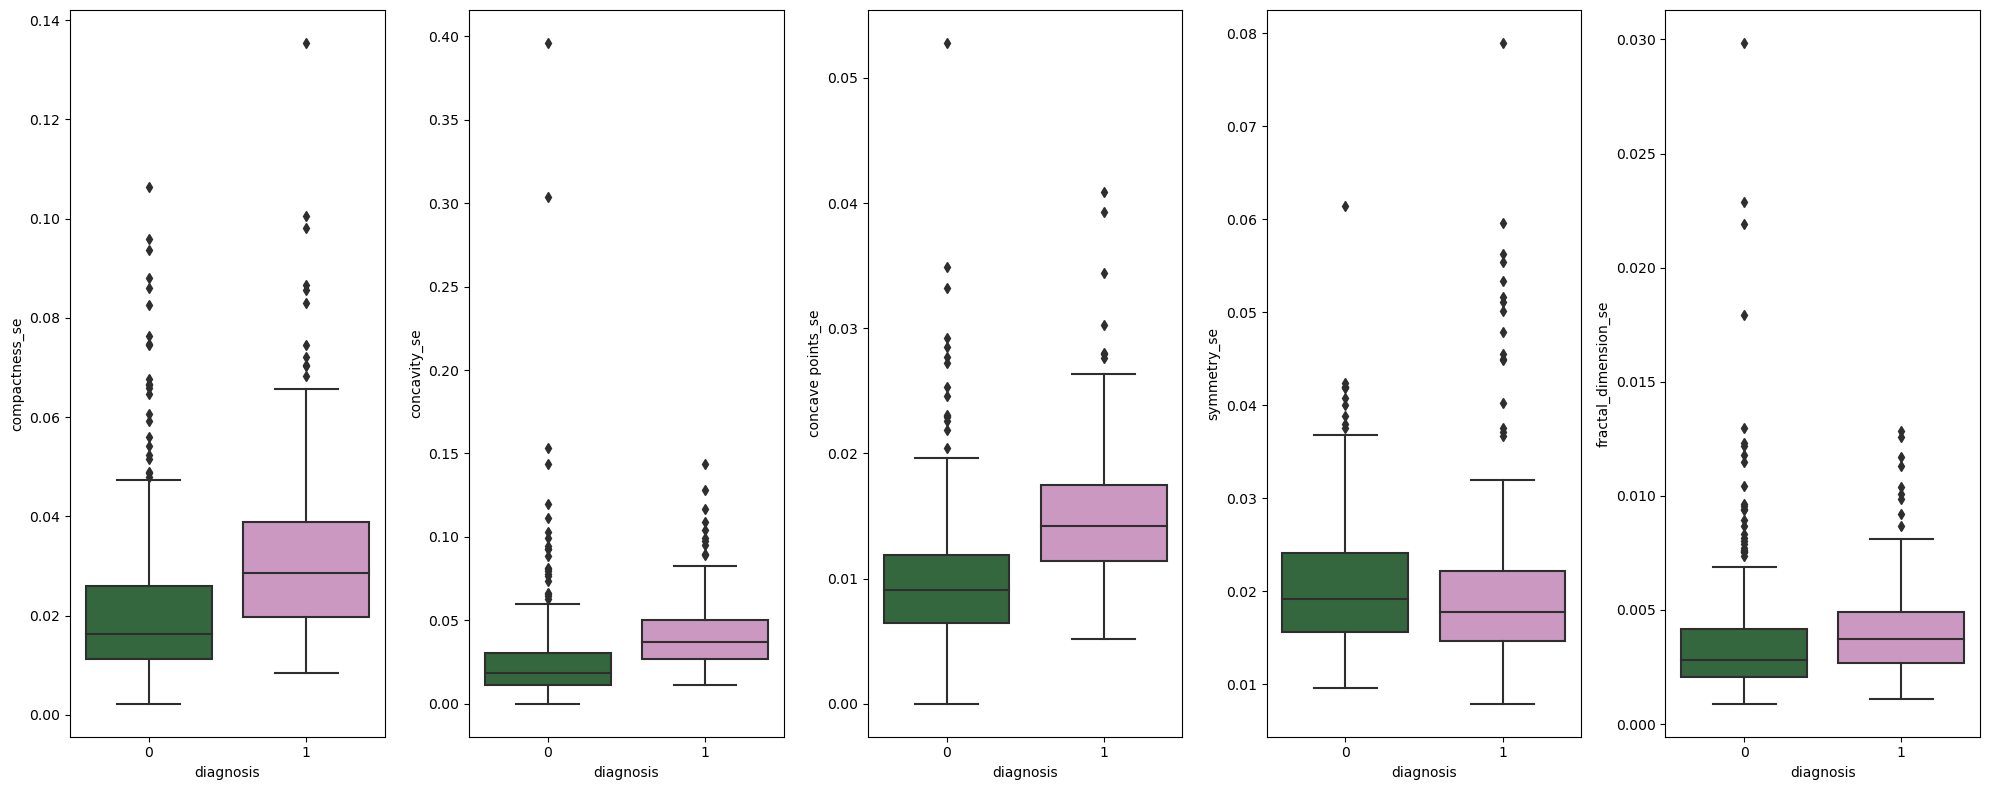

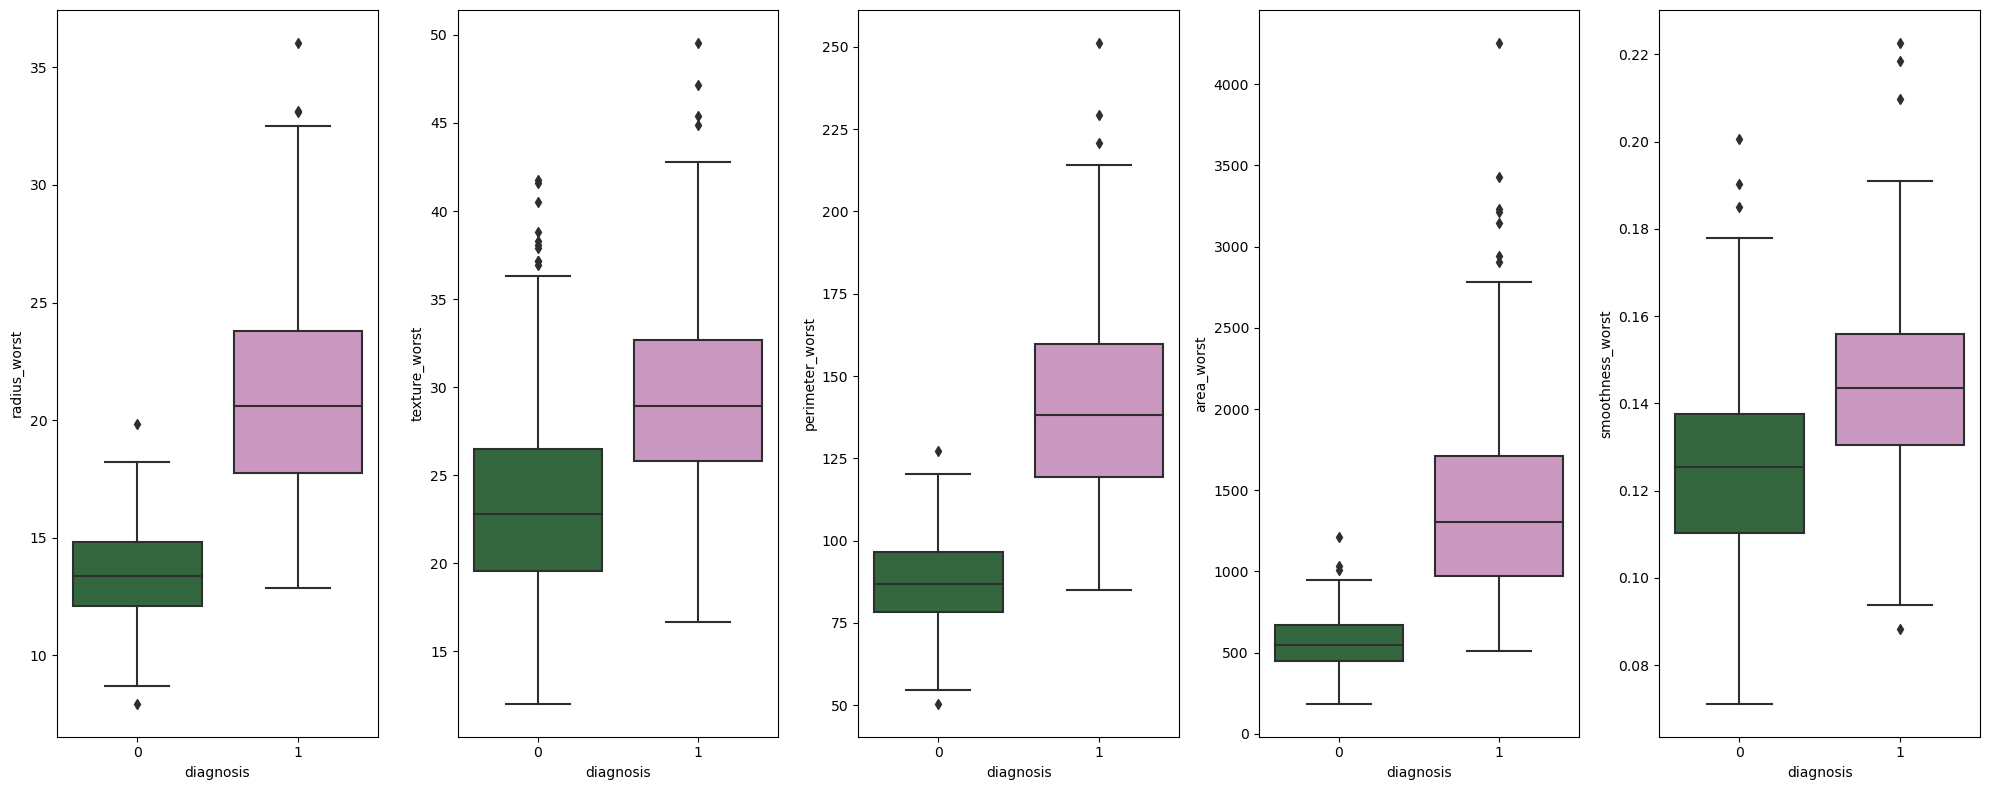

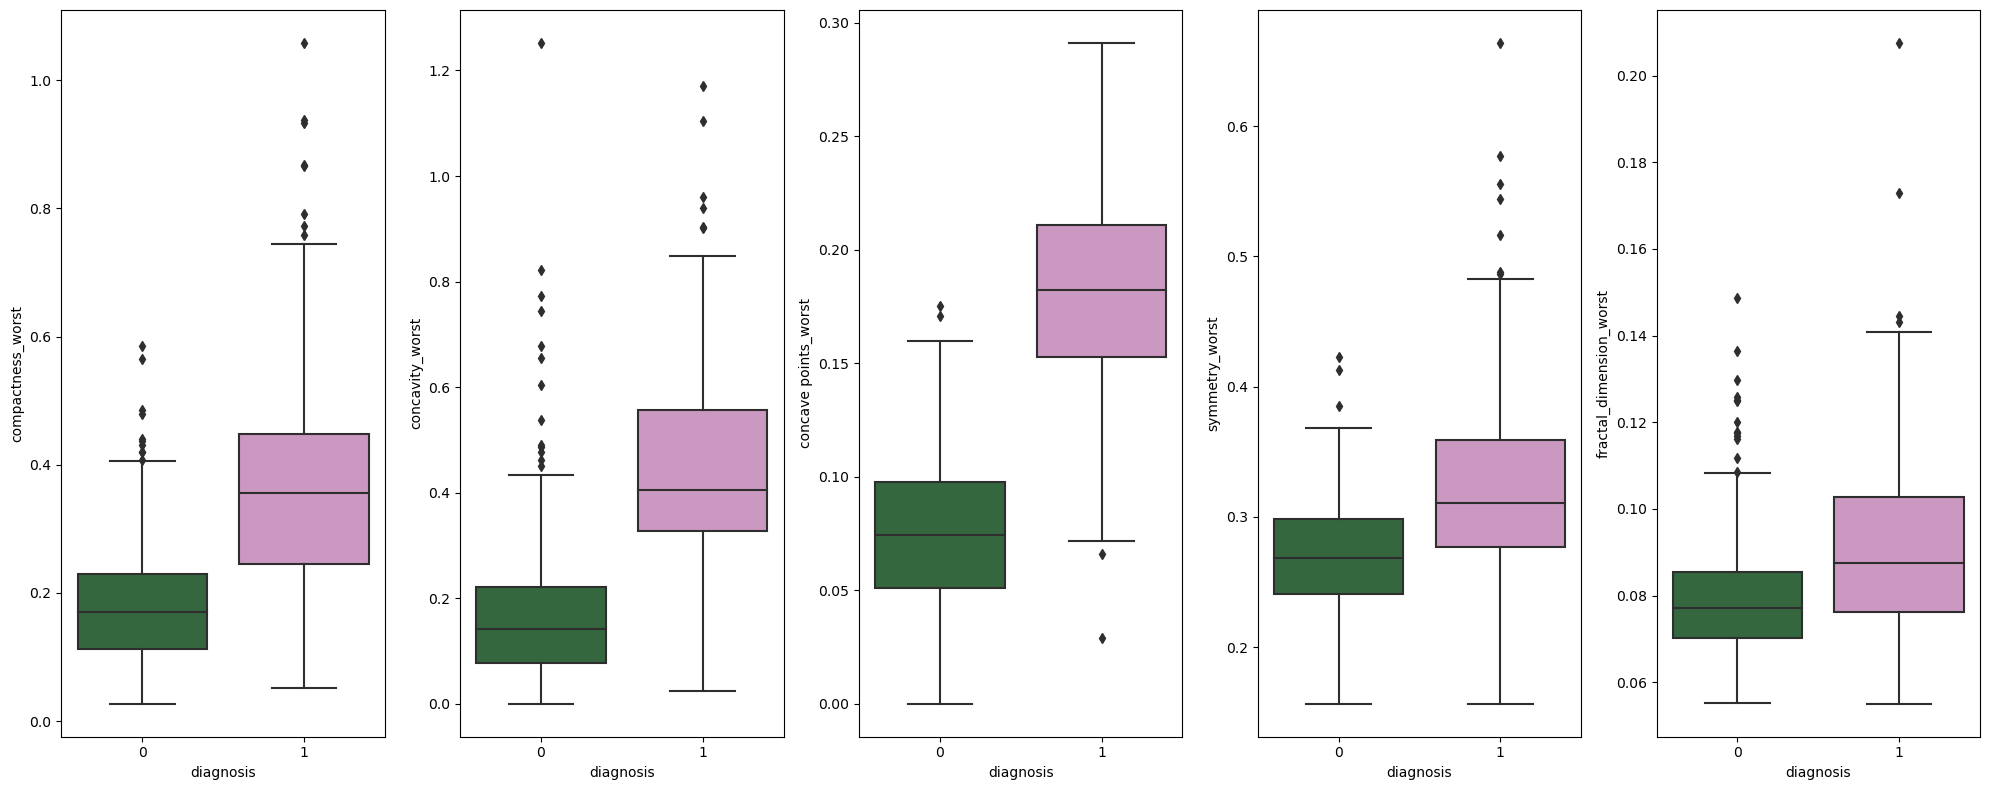

In [10]:
# Finding the defining independent variable using box plot

plt.rcParams['figure.figsize']=(20,8)
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
s.boxplot ( x= data['diagnosis'], y = data['radius_mean'], ax = ax1,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['texture_mean'], ax = ax2,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['perimeter_mean'], ax = ax3,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['area_mean'] , ax = ax4,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['smoothness_mean']  , ax = ax5,palette = 'cubehelix')
f .tight_layout()


f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
s.boxplot (x= data['diagnosis'], y = data['compactness_mean'], ax = ax1,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['concavity_mean'] , ax = ax2,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['concave points_mean'] , ax = ax3,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['symmetry_mean'], ax = ax4,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['fractal_dimension_mean'] , ax = ax5,palette = 'cubehelix')
f .tight_layout()


f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
s.boxplot (x= data['diagnosis'], y = data['radius_se'], ax = ax1,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['texture_se'], ax = ax2,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['perimeter_se'] , ax = ax3,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['area_se'], ax = ax4,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['smoothness_se'], ax = ax5,palette = 'cubehelix')
f .tight_layout()


f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
s.boxplot (x= data['diagnosis'], y = data['compactness_se'], ax = ax1,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['concavity_se'], ax = ax2,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['concave points_se'],  ax = ax3,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['symmetry_se'], ax = ax4,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['fractal_dimension_se'], ax = ax5,palette = 'cubehelix')
f .tight_layout()


f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
s.boxplot (x= data['diagnosis'], y = data['radius_worst'], ax = ax1,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['texture_worst'], ax = ax2,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['perimeter_worst'], ax = ax3,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['area_worst'], ax = ax4,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['smoothness_worst'], ax = ax5,palette = 'cubehelix')
f .tight_layout()


f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
s.boxplot (x= data['diagnosis'], y = data['compactness_worst'], ax = ax1,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['concavity_worst'] , ax = ax2,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['concave points_worst'], ax = ax3,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['symmetry_worst'], ax = ax4,palette = 'cubehelix')
s.boxplot (x= data['diagnosis'], y = data['fractal_dimension_worst'], ax = ax5,palette = 'cubehelix')
f .tight_layout()


In [11]:
# Selecting the required independent variables using box_plot and dropping the unwanted ones 
x = data.drop('diagnosis',axis =1).drop('id',axis =1).drop('smoothness_mean', axis = 1).drop('symmetry_mean', axis = 1).drop('fractal_dimension_mean', axis = 1).drop('texture_se', axis = 1).drop('smoothness_se', axis = 1).drop('symmetry_se', axis = 1).drop('fractal_dimension_se', axis = 1)
display(x)

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [34]:
# Writing a general function of fitting and prediction for all the models 

def FitModel (X,Y, algo_name , algorithm, gridSearchParams, cv):
    np.random.seed(10)
    x_train, x_test, y_train, y_test = train_test_split (X,Y,test_size = 0.25)
     
    # using GridSearchCV
    grid = GridSearchCV(estimator = algorithm, param_grid = gridSearchParams,
                        cv = cv, scoring = 'accuracy', verbose = 1 , n_jobs = -1 )
    
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict (x_test)
    cm = confusion_matrix (y_test,pred)
    print ('The prediction based on best parameter is:\n',pred)
    
    print ('Best Params :', best_params)
    print ('Classification Report:',classification_report(y_test,pred))
    print ('Accuracy Score', (accuracy_score(y_test,pred)))
    print ('Confusion Matrix :\n',cm)
    
    
    pickle.dump(grid_result,open(algo_name,'wb'))

        
    skfold= StratifiedKFold(n_splits=10)
    cv_accuracies = cross_val_score(estimator = algorithm, X = x_train,  y = y_train, cv = skfold)
    print ('Mean Cross_validation', cv_accuracies.mean())
    print ('STD Cross_validation', cv_accuracies.std())

In [35]:
# Using SVC model
param = {
            'C': [1,10,100,500,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }

FitModel (x,y,'SVC',SVC(), param, cv =20)


Fitting 20 folds for each of 45 candidates, totalling 900 fits
The prediction based on best parameter is:
 [1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1]
Best Params : {'C': 1, 'gamma': 0.0001}
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.95      0.95        91
           1       0.90      0.90      0.90        52

    accuracy                           0.93       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143

Accuracy Score 0.9300699300699301
Confusion Matrix :
 [[86  5]
 [ 5 47]]
Mean Cross_validation 0.910575858250277
STD Cross_validation 0.03347472615094886


In [15]:
# Using Random Forest model
param = { 'n_estimators': [1,10,100,500,1000,2000,5000]}
FitModel (x,y,'Random Forest',RandomForestClassifier(), param, cv =20)

Fitting 20 folds for each of 7 candidates, totalling 140 fits
The prediction based on best parameter is:
 [1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1]
Best Params : {'n_estimators': 500}
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99        91
           1       0.96      1.00      0.98        52

    accuracy                           0.99       143
   macro avg       0.98      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy Score 0.986013986013986
Confusion Matrix :
 [[89  2]
 [ 0 52]]
Mean Cross_validation 0.9575858250276855
STD Cross_validation 0.025668737195695915


In [16]:
# Using KNN Classifier model
param = { 'n_neighbors': [1,10,100,500,1000,2000,5000]}
FitModel (x,y,'KNN',KNeighborsClassifier(), param, cv =20)

Fitting 20 folds for each of 7 candidates, totalling 140 fits
The prediction based on best parameter is:
 [1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1]
Best Params : {'n_neighbors': 10}
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.96      0.95        91
           1       0.92      0.88      0.90        52

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143

Accuracy Score 0.9300699300699301
Confusion Matrix :
 [[87  4]
 [ 6 46]]
Mean Cross_validation 0.9271317829457365
STD Cross_validation 0.02888243175656194


In [36]:
# using xgboost Classifier model
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (x,y,'XGBoost', XGBClassifier(),param, cv = 20)

Fitting 20 folds for each of 4 candidates, totalling 80 fits
The prediction based on best parameter is:
 [1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1]
Best Params : {'n_estimators': 500}
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98        91
           1       0.96      0.96      0.96        52

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Accuracy Score 0.972027972027972
Confusion Matrix :
 [[89  2]
 [ 2 50]]
Mean Cross_validation 0.9693244739756368
STD Cross_validation 0.02616793178407337


In [18]:
# Using Over Sampling algorithm
from imblearn.over_sampling import SMOTE

print('Before Over Sampling algorithm:\n' )
display (data['diagnosis'].value_counts())

sm = SMOTE(random_state =42)
x_res, y_res = sm.fit_resample (x, y)

print('After Over Sampling algorithm:\n' )
display (display (y_res.value_counts()))

Before Over Sampling algorithm:



0    357
1    212
Name: diagnosis, dtype: int64

After Over Sampling algorithm:



1    357
0    357
Name: diagnosis, dtype: int64

None

In [49]:
# Using SVC model after oversampling 
param = {
            'C': [1,10,100,500,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }

FitModel (x_res, y_res,'SVC',SVC(), param, cv =20)


Fitting 20 folds for each of 45 candidates, totalling 900 fits
The prediction based on best parameter is:
 [1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1]
Best Params : {'C': 100, 'gamma': 0.0001}
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.96      0.97        89
           1       0.96      0.98      0.97        90

    accuracy                           0.97       179
   macro avg       0.97      0.97      0.97       179
weighted avg       0.97      0.97      0.97       179

Accuracy Score 0.9664804469273743
Confusion Matrix :
 [[85  4]
 [ 2 88]]
Mean Cross_validation 0.8802585604472396
STD Cross_validation 0.

In [50]:
# Using Random Forest model after ovesampling 
param = { 'n_estimators': [1,10,100,500,1000,2000,5000]}
FitModel (x_res, y_res,'Random Forest',RandomForestClassifier(), param, cv =20)

Fitting 20 folds for each of 7 candidates, totalling 140 fits
The prediction based on best parameter is:
 [1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1]
Best Params : {'n_estimators': 1000}
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99        89
           1       0.98      1.00      0.99        90

    accuracy                           0.99       179
   macro avg       0.99      0.99      0.99       179
weighted avg       0.99      0.99      0.99       179

Accuracy Score 0.9888268156424581
Confusion Matrix :
 [[87  2]
 [ 0 90]]
Mean Cross_validation 0.9586652690426275
STD Cross_validation 0.030276

In [51]:
# Using KNN Classifier model after oversampling 
param = { 'n_neighbors': [1,10,100,500,1000,2000,5000]}
FitModel (x_res, y_res,'KNN',KNeighborsClassifier(), param, cv =20)

Fitting 20 folds for each of 7 candidates, totalling 140 fits
The prediction based on best parameter is:
 [1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1]
Best Params : {'n_neighbors': 1}
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.94      0.94        89
           1       0.94      0.94      0.94        90

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179

Accuracy Score 0.9441340782122905
Confusion Matrix :
 [[84  5]
 [ 5 85]]
Mean Cross_validation 0.919601677148847
STD Cross_validation 0.01888373822

In [19]:
# using xgboost Classifier model after oversampling
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (x_res, y_res,'XGBoost', XGBClassifier(),param, cv = 20)

Fitting 20 folds for each of 4 candidates, totalling 80 fits
The prediction based on best parameter is:
 [1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.98        89
           1       0.97      1.00      0.98        90

    accuracy                           0.98       179
   macro avg       0.98      0.98      0.98       179
weighted avg       0.98      0.98      0.98       179

Accuracy Score 0.9832402234636871
Confusion Matrix :
 [[86  3]
 [ 0 90]]
Mean Cross_validation 0.9606219426974143
STD Cross_validation 0.03316268

In [20]:
# Using PCA dimension reduction

pca = PCA()
pca_x= pca.fit_transform(x_res)
pd.DataFrame(pca_x)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1043.209439,-298.463527,50.252323,-11.675826,30.119506,1.305237,1.108713,0.273103,0.780939,-0.410770,...,-0.045888,-0.013881,0.027868,-0.037542,-0.029380,0.018265,-0.000806,0.003478,-0.001636,0.002165
1,1152.880736,11.765512,-31.029752,17.658882,-2.078786,-0.256539,0.010189,-0.133851,-0.486651,0.058205,...,0.027093,-0.027491,0.008063,0.017664,0.010551,0.006392,0.021262,0.004749,-0.008913,0.000537
2,879.502198,35.386507,2.384864,4.110983,0.083216,-2.636645,-0.747131,0.231987,-0.141531,0.277075,...,-0.028630,-0.048118,0.004325,0.013916,-0.018136,-0.009790,-0.001909,-0.004988,0.001149,-0.000559
3,-523.666396,-69.079097,8.737865,-11.437277,5.598723,1.342465,-1.292123,0.045641,-0.316422,0.938858,...,-0.002481,-0.046042,0.038604,-0.022592,-0.010880,0.004194,0.007555,0.002047,-0.012131,-0.000282
4,814.274320,185.622932,6.791478,7.588350,8.778108,1.024753,-0.222556,-0.167614,0.043690,0.062522,...,-0.008868,0.019450,-0.017421,-0.002076,0.012143,-0.009985,0.008965,0.003327,0.000522,-0.002090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,-193.017848,-19.567589,-1.084684,-1.366949,6.792007,-0.480263,-0.282868,0.435123,-0.025595,0.071913,...,-0.032873,-0.000418,-0.006759,0.004369,0.006123,-0.003367,-0.010402,0.002932,-0.001390,-0.000904
710,433.692807,80.822560,-2.200266,2.497138,3.817125,-1.967271,0.671217,0.370664,0.020897,-0.019655,...,-0.044111,0.010319,-0.008792,-0.010233,-0.003546,0.016415,0.002576,-0.000980,-0.000673,0.002028
711,444.174326,200.189524,-23.560581,5.153798,-3.608307,0.557968,-0.495374,-0.150468,-0.283757,-0.059878,...,0.018340,-0.029257,0.002273,-0.007957,0.009575,-0.001924,-0.000544,0.000605,-0.001569,-0.003292
712,157.239771,-55.074517,-9.301753,-2.737995,3.129010,-1.040531,0.205324,0.271446,-0.348630,0.138182,...,0.043823,-0.000061,0.004849,-0.016233,-0.006074,-0.005877,-0.002224,-0.002121,0.001802,-0.000733


In [21]:
print (pd.DataFrame(pca.explained_variance_ratio_))

               0
0   9.833752e-01
1   1.513876e-02
2   1.286486e-03
3   1.133389e-04
4   7.588559e-05
5   5.796925e-06
6   3.562777e-06
7   5.709724e-07
8   3.096993e-07
9   6.439451e-08
10  1.492616e-08
11  6.146436e-09
12  4.059422e-09
13  3.022228e-09
14  1.241125e-09
15  7.161494e-10
16  3.695158e-10
17  3.187462e-10
18  1.505483e-10
19  1.043904e-10
20  6.150098e-11
21  3.906384e-11
22  6.749343e-12


In [22]:
pca = PCA(n_components = 9)
pca_x= pca.fit_transform(x_res)
pd.DataFrame(pca_x)

,0,1,2,3,4,5,6,7,8
0,1043.209439,-298.463527,50.252323,-11.675826,30.119506,1.305237,1.108713,0.273103,0.780939
1,1152.880736,11.765512,-31.029752,17.658882,-2.078786,-0.256539,0.010189,-0.133851,-0.486651
2,879.502198,35.386507,2.384864,4.110983,0.083216,-2.636645,-0.747131,0.231987,-0.141531
3,-523.666396,-69.079097,8.737865,-11.437277,5.598723,1.342465,-1.292123,0.045641,-0.316422
4,814.274320,185.622932,6.791478,7.588350,8.778108,1.024753,-0.222556,-0.167614,0.043690
...,...,...,...,...,...,...,...,...,...
709,-193.017848,-19.567589,-1.084684,-1.366949,6.792007,-0.480263,-0.282868,0.435123,-0.025595
710,433.692807,80.822560,-2.200266,2.497138,3.817125,-1.967271,0.671217,0.370664,0.020897
711,444.174326,200.189524,-23.560581,5.153798,-3.608307,0.557968,-0.495374,-0.150468,-0.283757
712,157.239771,-55.074517,-9.301753,-2.737995,3.129010,-1.040531,0.205324,0.271446,-0.348630


In [23]:
print (pd.DataFrame(pca.explained_variance_ratio_))

              0
0  9.833752e-01
1  1.513876e-02
2  1.286486e-03
3  1.133389e-04
4  7.588559e-05
5  5.796925e-06
6  3.562777e-06
7  5.709724e-07
8  3.096993e-07


In [67]:
# Using SVC model after PCA 
param = {
            'C': [1,10,100,500,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }

FitModel (pca_x, y_res,'SVC',SVC(), param, cv =20)


Fitting 20 folds for each of 45 candidates, totalling 900 fits
The prediction based on best parameter is:
 [1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1]
Best Params : {'C': 100, 'gamma': 0.0001}
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.96      0.97        89
           1       0.96      0.98      0.97        90

    accuracy                           0.97       179
   macro avg       0.97      0.97      0.97       179
weighted avg       0.97      0.97      0.97       179

Accuracy Score 0.9664804469273743
Confusion Matrix :
 [[85  4]
 [ 2 88]]
Mean Cross_validation 0.893361285814116
STD Cross_validation 0.0

In [73]:
# Using Random Forest model after PCA 
param = { 'n_estimators': [1,10,100,500,1000,2000,5000]}
FitModel (pca_x, y_res,'Random Forest',RandomForestClassifier(), param, cv =20)

Fitting 20 folds for each of 7 candidates, totalling 140 fits
The prediction based on best parameter is:
 [1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.96      0.98        89
           1       0.96      1.00      0.98        90

    accuracy                           0.98       179
   macro avg       0.98      0.98      0.98       179
weighted avg       0.98      0.98      0.98       179

Accuracy Score 0.9776536312849162
Confusion Matrix :
 [[85  4]
 [ 0 90]]
Mean Cross_validation 0.9457023060796645
STD Cross_validation 0.0273007

In [74]:
# Using KNN Classifier model after PCA 
param = { 'n_neighbors': [1,10,100,500,1000,2000,5000]}
FitModel (pca_x, y_res,'KNN',KNeighborsClassifier(), param, cv =20)

Fitting 20 folds for each of 7 candidates, totalling 140 fits
The prediction based on best parameter is:
 [1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1]
Best Params : {'n_neighbors': 1}
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.94      0.94        89
           1       0.94      0.94      0.94        90

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.94      0.94      0.94       179

Accuracy Score 0.9441340782122905
Confusion Matrix :
 [[84  5]
 [ 5 85]]
Mean Cross_validation 0.919601677148847
STD Cross_validation 0.01888373822

In [24]:
# using xgboost Classifier model after PCA
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (pca_x, y_res,'XGBoost', XGBClassifier(),param, cv = 20)

Fitting 20 folds for each of 4 candidates, totalling 80 fits
The prediction based on best parameter is:
 [1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       0.99      0.94      0.97        89
           1       0.95      0.99      0.97        90

    accuracy                           0.97       179
   macro avg       0.97      0.97      0.97       179
weighted avg       0.97      0.97      0.97       179

Accuracy Score 0.9664804469273743
Confusion Matrix :
 [[84  5]
 [ 1 89]]
Mean Cross_validation 0.9457721872816214
STD Cross_validation 0.02433572

In [28]:
# Using LDA dimension reduction

lda = LDA()
lda_x = lda.fit_transform(x_res, y_res)
display (pd.DataFrame(lda_x))

,0
0,-2.280220
1,-1.456176
2,-3.126647
3,-3.072220
4,-1.531472
...,...
709,0.030447
710,-0.697447
711,-1.049936
712,-1.582221


In [29]:
lda.explained_variance_ratio_

array([1.])

In [77]:
# Using SVC model after LDA
param = {
            'C': [1,10,100,500,1000],
            'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }

FitModel (lda_x, y_res,'SVC',SVC(), param, cv =20)


Fitting 20 folds for each of 45 candidates, totalling 900 fits
The prediction based on best parameter is:
 [1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1]
Best Params : {'C': 500, 'gamma': 100}
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.97      0.97        89
           1       0.97      0.98      0.97        90

    accuracy                           0.97       179
   macro avg       0.97      0.97      0.97       179
weighted avg       0.97      0.97      0.97       179

Accuracy Score 0.9720670391061452
Confusion Matrix :
 [[86  3]
 [ 2 88]]
Mean Cross_validation 0.9774982529699511
STD Cross_validation 0.016

In [78]:
# Using Random Forest model after LDA 
param = { 'n_estimators': [1,10,100,500,1000,2000,5000]}
FitModel (lda_x, y_res,'Random Forest',RandomForestClassifier(), param, cv =20)

Fitting 20 folds for each of 7 candidates, totalling 140 fits
The prediction based on best parameter is:
 [1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1]
Best Params : {'n_estimators': 10}
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.98      0.98      0.98        90

    accuracy                           0.98       179
   macro avg       0.98      0.98      0.98       179
weighted avg       0.98      0.98      0.98       179

Accuracy Score 0.9776536312849162
Confusion Matrix :
 [[87  2]
 [ 2 88]]
Mean Cross_validation 0.9680992313067784
STD Cross_validation 0.01901555

In [79]:
# Using KNN Classifier model after LDA 
param = { 'n_neighbors': [1,10,100,500,1000,2000,5000]}
FitModel (lda_x, y_res,'KNN',KNeighborsClassifier(), param, cv =20)

Fitting 20 folds for each of 7 candidates, totalling 140 fits
The prediction based on best parameter is:
 [1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1]
Best Params : {'n_neighbors': 10}
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.99      0.98      0.98        90

    accuracy                           0.98       179
   macro avg       0.98      0.98      0.98       179
weighted avg       0.98      0.98      0.98       179

Accuracy Score 0.9832402234636871
Confusion Matrix :
 [[88  1]
 [ 2 88]]
Mean Cross_validation 0.9794199860237596
STD Cross_validation 0.013134552

In [30]:
# using xgboost Classifier model after LDA
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (lda_x, y_res,'XGBoost', XGBClassifier(),param, cv = 20)

Fitting 20 folds for each of 4 candidates, totalling 80 fits
The prediction based on best parameter is:
 [1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1]
Best Params : {'n_estimators': 100}
Classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.98      0.98      0.98        90

    accuracy                           0.98       179
   macro avg       0.98      0.98      0.98       179
weighted avg       0.98      0.98      0.98       179

Accuracy Score 0.9776536312849162
Confusion Matrix :
 [[87  2]
 [ 2 88]]
Mean Cross_validation 0.9755765199161426
STD Cross_validation 0.01892506